In [4]:
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

[[-10 -10 -10]
 [-10  80 -10]
 [-10 -10 -10]]


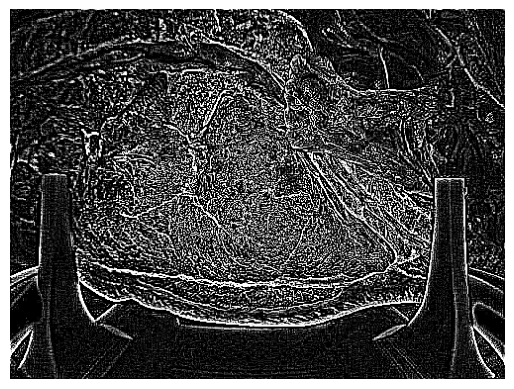

In [26]:
# Load the image from the file
image_path = "./img/Images_originales_redim/0024.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise ValueError("Image not loaded correctly. Check the file path.")

# Convert the image to grayscale
img_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the kernel
kernel = np.array([[-10, -10, -10], [-10, 80, -10], [-10, -10, -10]])
print(kernel)

# Apply the filter to the grayscale image
img_filtered = cv2.filter2D(img_bw, -1, kernel)

# Display the filtered image
plt.axis('off')
plt.imshow(img_filtered, cmap='gray')
plt.show()

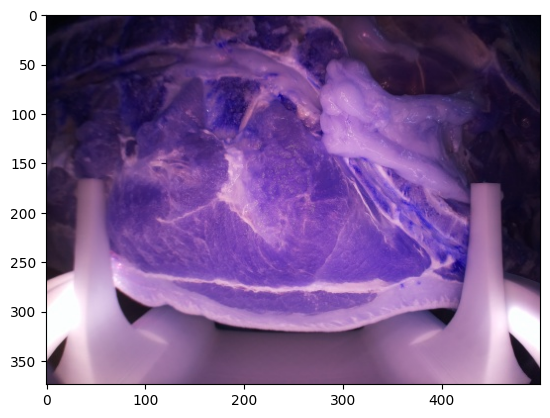

In [27]:
plt.imshow(image)


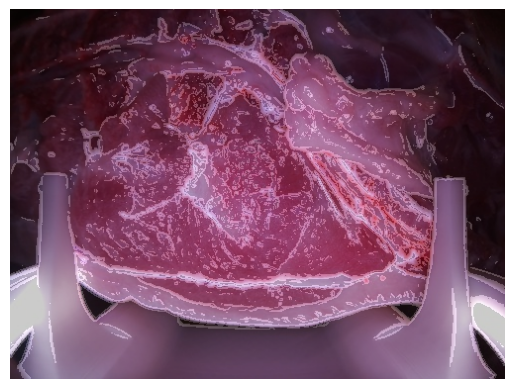

In [28]:
# Vérifier si l'image est chargée correctement
if image is None:
    raise ValueError("Image non chargée correctement. Vérifiez le chemin du fichier.")

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre de Sobel pour détecter les contours
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculer la magnitude des gradients
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude)

# Appliquer un seuillage pour obtenir des contours plus nets
_, thresholded = cv2.threshold(sobel_magnitude, 50, 255, cv2.THRESH_BINARY)

# Superposer les contours sur l'image originale
contours = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)
highlighted = cv2.addWeighted(image, 0.8, contours, 0.2, 0)

# Afficher l'image avec les contours mis en évidence
plt.axis('off')
plt.imshow(cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB))
plt.show()

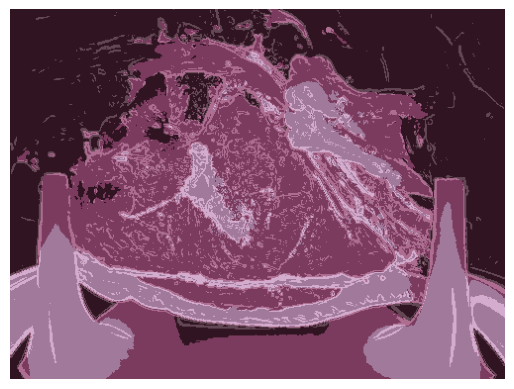

In [29]:
def quantize_colors(image, k):
    # Convert the image to the RGB color space
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)

    # Define criteria and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert back into uint8 and make the original image
    center = np.uint8(center)
    res = center[label.flatten()]
    quantized_image = res.reshape((image.shape))
    
    return quantized_image

# Charger l'image
image = cv2.imread(image_path)

# Vérifier si l'image est chargée correctement
if image is None:
    raise ValueError("Image non chargée correctement. Vérifiez le chemin du fichier.")

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre de Sobel pour détecter les contours
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculer la magnitude des gradients
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.uint8(sobel_magnitude)

# Appliquer un seuillage pour obtenir des contours plus nets
_, thresholded = cv2.threshold(sobel_magnitude, 50, 255, cv2.THRESH_BINARY)

# Quantifier les couleurs de l'image pour obtenir seulement trois couleurs
quantized_image = quantize_colors(image, 3)

# Superposer les contours sur l'image quantifiée
contours = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2BGR)
highlighted = cv2.addWeighted(quantized_image, 0.8, contours, 0.2, 0)

# Afficher l'image avec les contours mis en évidence
plt.axis('off')
plt.imshow(cv2.cvtColor(highlighted, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def color_transfer(source, target):
    """
    Transfers the color distribution from the target to the source image.
    """
    # Convert images to arrays
    source = np.asarray(source, dtype=np.float32)
    target = np.asarray(target, dtype=np.float32)

    # Split the images into their respective channels
    source_r, source_g, source_b = source[..., 0], source[..., 1], source[..., 2]
    target_r, target_g, target_b = target[..., 0], target[..., 1], target[..., 2]

    # Compute the mean and standard deviation of each channel
    mean_src_r, mean_src_g, mean_src_b = np.mean(source_r), np.mean(source_g), np.mean(source_b)
    std_src_r, std_src_g, std_src_b = np.std(source_r), np.std(source_g), np.std(source_b)

    mean_tar_r, mean_tar_g, mean_tar_b = np.mean(target_r), np.mean(target_g), np.mean(target_b)
    std_tar_r, std_tar_g, std_tar_b = np.std(target_r), np.std(target_g), np.std(target_b)

    # Transfer the color distribution
    transfer_r = (source_r - mean_src_r) * (std_tar_r / std_src_r) + mean_tar_r
    transfer_g = (source_g - mean_src_g) * (std_tar_g / std_src_g) + mean_tar_g
    transfer_b = (source_b - mean_src_b) * (std_tar_b / std_src_b) + mean_tar_b

    # Clip the values to be in valid range
    transfer_r = np.clip(transfer_r, 0, 255)
    transfer_g = np.clip(transfer_g, 0, 255)
    transfer_b = np.clip(transfer_b, 0, 255)

    # Merge the channels back
    transfer = np.stack([transfer_r, transfer_g, transfer_b], axis=-1).astype(np.uint8)

    return Image.fromarray(transfer)

# Apply color transfer
transferred_img = color_transfer(img1, img2)

# Display the transferred image
plt.imshow(transferred_img)
plt.title("Transferred Image")
plt.axis('off')
plt.show()


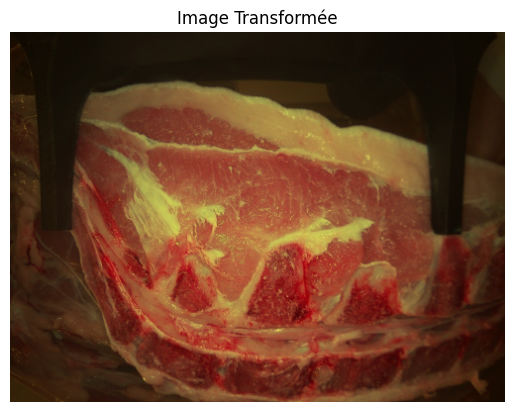

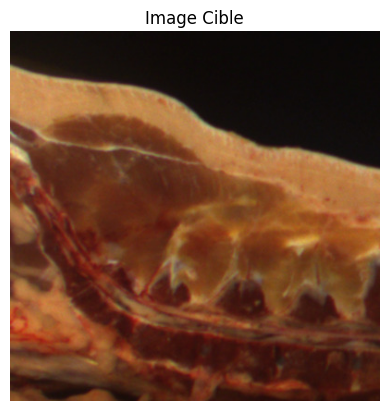

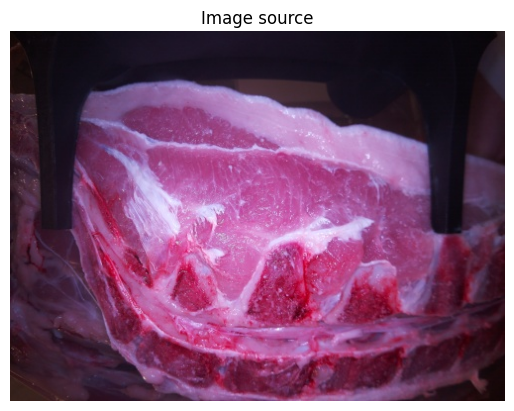

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def transferer_couleurs(source, cible):
    """
    Transfère la distribution des couleurs de l'image cible à l'image source.
    """
    # Convertir les images en tableaux numpy
    source = np.asarray(source, dtype=np.float32)
    cible = np.asarray(cible, dtype=np.float32)

    # Séparer les images en leurs canaux respectifs
    source_r, source_g, source_b = source[..., 0], source[..., 1], source[..., 2]
    cible_r, cible_g, cible_b = cible[..., 0], cible[..., 1], cible[..., 2]

    # Calculer la moyenne et l'écart type de chaque canal
    moyenne_src_r, moyenne_src_g, moyenne_src_b = np.mean(source_r), np.mean(source_g), np.mean(source_b)
    ecart_type_src_r, ecart_type_src_g, ecart_type_src_b = np.std(source_r), np.std(source_g), np.std(source_b)

    moyenne_cible_r, moyenne_cible_g, moyenne_cible_b = np.mean(cible_r), np.mean(cible_g), np.mean(cible_b)
    ecart_type_cible_r, ecart_type_cible_g, ecart_type_cible_b = np.std(cible_r), np.std(cible_g), np.std(cible_b)

    # Transférer la distribution des couleurs
    transfert_r = (source_r - moyenne_src_r) * (ecart_type_cible_r / ecart_type_src_r) + moyenne_cible_r
    transfert_g = (source_g - moyenne_src_g) * (ecart_type_cible_g / ecart_type_src_g) + moyenne_cible_g
    transfert_b = (source_b - moyenne_src_b) * (ecart_type_cible_b / ecart_type_src_b) + moyenne_cible_b

    # Limiter les valeurs pour qu'elles soient dans la plage valide
    transfert_r = np.clip(transfert_r, 0, 255)
    transfert_g = np.clip(transfert_g, 0, 255)
    transfert_b = np.clip(transfert_b, 0, 255)

    # Recomposer les canaux
    transfert = np.stack([transfert_r, transfert_g, transfert_b], axis=-1).astype(np.uint8)

    return Image.fromarray(transfert)

# Chemins vers les images
chemin_image_source = './img/Images_originales_redim/0001.jpg'
chemin_image_cible = './img/Images_originales/000002.jpg'

# Charger les images
image_source = Image.open(chemin_image_source)
image_cible = Image.open(chemin_image_cible)

# Appliquer le transfert de couleurs
image_transformee = transferer_couleurs(image_source, image_cible)

# Afficher l'image transformée
plt.imshow(image_transformee)
plt.title("Image Transformée")
plt.axis('off')
plt.show()
plt.imshow(image_cible)
plt.title("Image Cible")
plt.axis('off')
plt.show()
plt.imshow(image_source)
plt.title("Image source")
plt.axis('off')
plt.show()


# Sauvegarder l'image transformée si nécessaire
image_transformee.save('./img/TEST_TRANSFO/trans.jpg')
image_source.save('./img/TEST_TRANSFO/source.jpg')


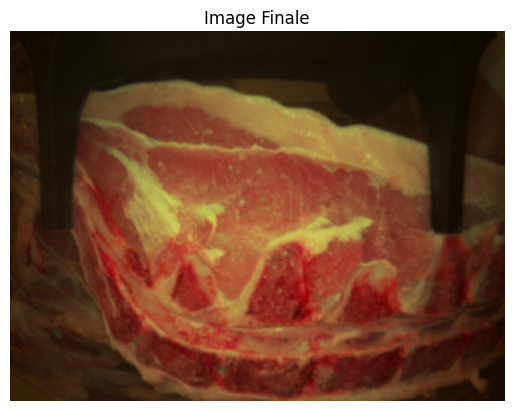

In [12]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

def transferer_couleurs(source, cible):
    """
    Transfère la distribution des couleurs de l'image cible à l'image source.
    """
    # Convertir les images en tableaux numpy
    source = np.asarray(source, dtype=np.float32)
    cible = np.asarray(cible, dtype=np.float32)

    # Séparer les images en leurs canaux respectifs
    source_r, source_g, source_b = source[..., 0], source[..., 1], source[..., 2]
    cible_r, cible_g, cible_b = cible[..., 0], cible[..., 1], cible[..., 2]

    # Calculer la moyenne et l'écart type de chaque canal
    moyenne_src_r, moyenne_src_g, moyenne_src_b = np.mean(source_r), np.mean(source_g), np.mean(source_b)
    ecart_type_src_r, ecart_type_src_g, ecart_type_src_b = np.std(source_r), np.std(source_g), np.std(source_b)

    moyenne_cible_r, moyenne_cible_g, moyenne_cible_b = np.mean(cible_r), np.mean(cible_g), np.mean(cible_b)
    ecart_type_cible_r, ecart_type_cible_g, ecart_type_cible_b = np.std(cible_r), np.std(cible_g), np.std(cible_b)

    # Transférer la distribution des couleurs
    transfert_r = (source_r - moyenne_src_r) * (ecart_type_cible_r / ecart_type_src_r) + moyenne_cible_r
    transfert_g = (source_g - moyenne_src_g) * (ecart_type_cible_g / ecart_type_src_g) + moyenne_cible_g
    transfert_b = (source_b - moyenne_src_b) * (ecart_type_cible_b / ecart_type_src_b) + moyenne_cible_b

    # Limiter les valeurs pour qu'elles soient dans la plage valide
    transfert_r = np.clip(transfert_r, 0, 255)
    transfert_g = np.clip(transfert_g, 0, 255)
    transfert_b = np.clip(transfert_b, 0, 255)

    # Recomposer les canaux
    transfert = np.stack([transfert_r, transfert_g, transfert_b], axis=-1).astype(np.uint8)

    return Image.fromarray(transfert)

def reduire_brillance(image):
    """
    Réduit l'aspect brillant de l'image en appliquant un filtre de flou gaussien.
    """
    return image.filter(ImageFilter.GaussianBlur(radius=1))

# Chemins vers les images
chemin_image_source = './img/Images_originales_redim/0001.jpg'
chemin_image_cible = './img/Images_originales/000002.jpg'

# Charger les images
image_source = Image.open(chemin_image_source)
image_cible = Image.open(chemin_image_cible)

# Appliquer le transfert de couleurs
image_transformee = transferer_couleurs(image_source, image_cible)

# Réduire l'aspect brillant
image_finale = reduire_brillance(image_transformee)

# Afficher l'image finale
plt.imshow(image_finale)
plt.title("Image Finale")
plt.axis('off')
plt.show()

# Sauvegarder l'image finale si nécessaire
image_source.save('./img/TEST_TRANSFO/brillant.jpg')
